In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization, Flatten,  GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
import os

In [2]:
mapping= {

    0 : "0", 1 : "1", 2 : "2", 3 : "3", 4 : "4", 
    5 : "5", 6 : "6", 7 : "7", 8 : "8", 9 : "9", 
    10 : "A", 11 : "B", 12 : "C", 13 : "D", 14 : "E", 
    15 : "F", 16 : "G", 17 : "H", 18 : "I", 19 : "J",
    20 : "K", 21 : "L", 22 :"M", 23: "N", 24 : "O",
    25 : "P", 26 : "Q", 27 : "R", 28 : "S", 29 : "T",
    30 : "U", 31 : "V", 32 : "W", 33 : "X", 34 : "Y", 35: "Z"

}

inv_mapping = {v:k for k, v in mapping.items()}
print(inv_mapping)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35}


# **DATA LOADING AND PREPROCESSING**

In [3]:
train_images = []
train_labels = []
val_images = []
val_labels = []
path = "../input/mosaic-ps2/dataset"
print("loading data")
for label, i in enumerate(sorted(os.listdir(path))):
    length = len(os.listdir(os.path.join(path, i)))
    print(length)
    train_len=  int(0.8*length) # 80 percent taken for train and rest for validation
    for index, j in enumerate(os.listdir(os.path.join(path, i))):
        img = cv2.imread(os.path.join(path, i, j))
        img = cv2.resize(img, (64,64), cv2.INTER_AREA)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).reshape(64,64,1).astype("float32")/255
        if index<train_len:
            train_images.append(img)
            train_labels.append(inv_mapping[i])
        else:
            val_images.append(img)
            val_labels.append(inv_mapping[i])

print('Complete')

loading data
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
1016
Complete


In [4]:
np.unique(val_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [5]:
train_images = np.asarray(train_images)
val_images = np.asarray(val_images)
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes = 36)
val_labels = tf.keras.utils.to_categorical(val_labels, num_classes = 36)

In [6]:
train_images.shape

(29232, 64, 64, 1)

In [7]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
traingen = train_datagen.flow(train_images, train_labels, batch_size=16, shuffle = True)
valgen = test_datagen.flow(val_images, val_labels, batch_size=16)

# **MODEL BUILDING**

In [16]:
model_vc = Sequential()
model_vc.add(Conv2D(256, (3, 3), strides = 1, activation='relu', input_shape=(64, 64, 1)))
model_vc.add(BatchNormalization())
model_vc.add(Conv2D(256, (3, 3), strides = 1, activation='relu'))
model_vc.add(BatchNormalization())
model_vc.add(Dropout(0.1))
model_vc.add(Conv2D(256, (3, 3), strides = 2, activation='relu'))
model_vc.add(BatchNormalization())
model_vc.add(Conv2D(128, (3, 3), strides = 2, activation='relu'))
model_vc.add(BatchNormalization())
model_vc.add(Dropout(0.1))
model_vc.add(Conv2D(128, (3, 3), strides = 2, activation='relu'))
model_vc.add(BatchNormalization())
model_vc.add(Conv2D(128, (3, 3), strides = 2, activation='relu'))
model_vc.add(BatchNormalization())
model_vc.add(Dropout(0.2))

model_vc.add(Flatten())

model_vc.add(Dense(256, activation = "relu"))
model_vc.add(BatchNormalization())
model_vc.add(Dropout(0.2))
model_vc.add(Dense(128, activation = "relu"))
model_vc.add(BatchNormalization())
model_vc.add(Dropout(0.1))
model_vc.add(Dense(36, activation = "softmax"))

In [17]:
model_vc.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 62, 62, 256)       2560      
_________________________________________________________________
batch_normalization_37 (Batc (None, 62, 62, 256)       1024      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 60, 60, 256)       590080    
_________________________________________________________________
batch_normalization_38 (Batc (None, 60, 60, 256)       1024      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 29, 29, 256)       590080    
_________________________________________________________________
batch_normalization_39 (Batc (None, 29, 29, 256)       1024      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 128)      

In [18]:
model_vc.compile(loss='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(lr = 1e-3), metrics = ['accuracy'])

In [19]:
callbacks = [
             ModelCheckpoint(
                                filepath='model_vc.h5',
                                save_freq='epoch',
                                save_weights_only=True,
                                mode = "max",
                                monitor = "val_accuracy",
                                verbose=1, 
                                save_best_only = True
                            ),
            EarlyStopping(monitor="val_loss", mode="min", patience=25),
            LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)
            #keras.callbacks.TensorBoard(log_dir='./Graph_vowels', histogram_freq=0, write_graph=True, write_images=True)
             
]

In [20]:
history = model_vc.fit(traingen, steps_per_epoch = len(train_images)//16, epochs = 120, 
                       validation_data= valgen, validation_steps = len(val_images)//16, callbacks = callbacks, verbose = 1)

Epoch 1/120
1827/1827 [==============================] - 62s 32ms/step - loss: 1.3035 - accuracy: 0.6637 - val_loss: 0.5747 - val_accuracy: 0.8626

Epoch 00001: val_accuracy improved from -inf to 0.86261, saving model to model_vc.h5
Epoch 2/120
1827/1827 [==============================] - 58s 32ms/step - loss: 0.3586 - accuracy: 0.8972 - val_loss: 0.3123 - val_accuracy: 0.9175

Epoch 00002: val_accuracy improved from 0.86261 to 0.91748, saving model to model_vc.h5
Epoch 3/120
1827/1827 [==============================] - 58s 32ms/step - loss: 0.2710 - accuracy: 0.9189 - val_loss: 0.4061 - val_accuracy: 0.9044

Epoch 00003: val_accuracy did not improve from 0.91748
Epoch 4/120
1827/1827 [==============================] - 59s 32ms/step - loss: 0.2258 - accuracy: 0.9310 - val_loss: 0.1714 - val_accuracy: 0.9474

Epoch 00004: val_accuracy improved from 0.91748 to 0.94744, saving model to model_vc.h5
Epoch 5/120
1827/1827 [==============================] - 59s 32ms/step - loss: 0.1841 - accu

KeyboardInterrupt: 

NameError: name 'history' is not defined

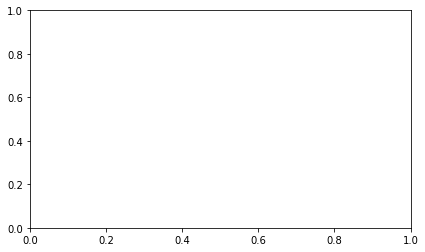

In [21]:
plt.figure(figsize=(15,4))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color = "g", label = "train_loss")
ax1.plot(history.history['val_loss'], color = "r", label = "al_loss")
ax1.legend()
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color = "g", label = "train_Accuracy")
ax2.plot(history.history['val_accuracy'], color = "r", label = "val_Accuracy")
ax2.legend()
plt.savefig("metrics.png")

In [22]:
model_vc.load_weights("model_vc.h5")
model_vc.save("98.93-98.05.h5")

In [23]:
model_vc.evaluate(valgen)

459/459 [==============================] - 5s 10ms/step - loss: 0.1118 - accuracy: 0.9751


[0.11177898198366165, 0.9750816822052002]

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [25]:
import itertools
def plot_confusion_matrix(cm, classes=['0','1'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       204
           1       0.98      0.97      0.98       204
           2       1.00      1.00      1.00       204
           3       0.99      1.00      1.00       204
           4       0.99      1.00      0.99       204
           5       1.00      1.00      1.00       204
           6       0.99      1.00      0.99       204
           7       0.98      1.00      0.99       204
           8       1.00      1.00      1.00       204
           9       0.99      1.00      0.99       204
          10       0.98      0.98      0.98       204
          11       0.97      0.97      0.97       204
          12       1.00      1.00      1.00       204
          13       0.99      0.98      0.99       204
          14       0.98      0.97      0.97       204
          15       0.97      0.97      0.97       204
          16       0.99      0.98      0.99       204
          17       1.00    

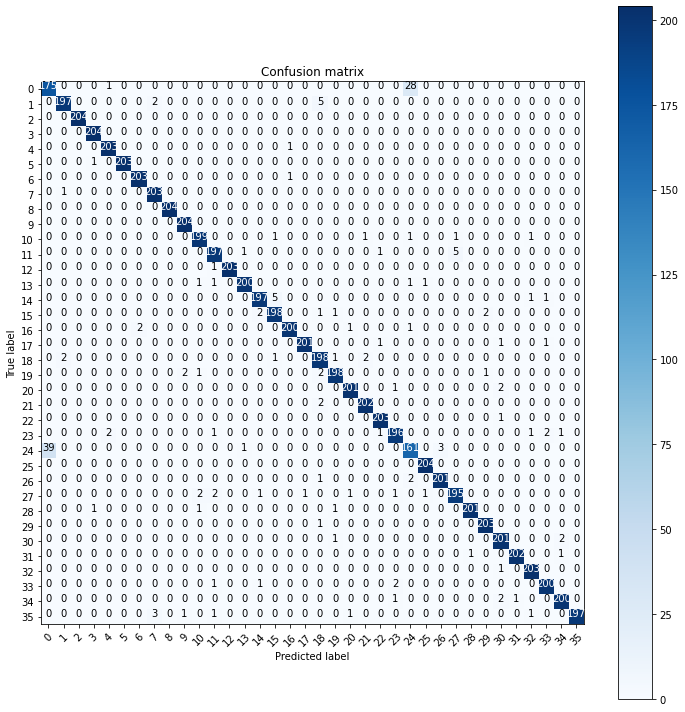

In [26]:
predict = model_vc.predict(val_images)
pred_labs  =np.argmax(predict, axis =1)
confusion = confusion_matrix(np.argmax(val_labels, axis=1), pred_labs)
report = classification_report(np.argmax(val_labels, axis=1), pred_labs)

print(report)
plt.figure(figsize=(10,10))
plot_confusion_matrix(confusion, classes=list(range(0,36)),
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
plt.savefig('confuse')

In [ ]:
plt.imshow(val_images[np.argmax(val_labels, axis=1)==24][0][:,:,0])